# draft

### 좀 더 그럴듯한 자료 

`-` 위의 toy example은 데이터가 너무 작아서 억지스러움 

In [56]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/extremum.csv')

In [57]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,146,전주,2020-01-01,-0.5,4.3,15:09,-6.4,1:42,10.7
1,146,전주,2020-01-02,1.4,6.5,14:12,-3.0,7:55,9.5
2,146,전주,2020-01-03,2.6,7.6,13:32,-0.5,23:53,8.1
3,146,전주,2020-01-04,2.0,7.7,13:51,-2.6,5:30,10.3
4,146,전주,2020-01-05,2.5,8.6,14:05,-3.2,7:36,11.8
...,...,...,...,...,...,...,...,...,...
651,146,전주,2021-10-13,19.9,25.5,14:29,15.6,3:49,9.9
652,146,전주,2021-10-14,20.4,25.5,13:36,17.0,6:15,8.5
653,146,전주,2021-10-15,18.3,22.0,13:47,15.7,4:48,6.3
654,146,전주,2021-10-16,12.8,17.4,0:01,6.5,23:31,10.9


`-` 평균기온만 선택하여 뽑자. 

In [55]:
dict(pd.Series(df.columns))

{0: '지점번호',
 1: '지점명',
 2: '일시',
 3: '평균기온(℃)',
 4: '최고기온(℃)',
 5: '최고기온시각',
 6: '최저기온(℃)',
 7: '최저기온시각일교차',
 8: 'Unnamed: 8'}

In [58]:
temp=np.array(df.iloc[:,3])

In [59]:
len(temp)

656

`-` 온도 vs 아이스크림 판매량 

In [60]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

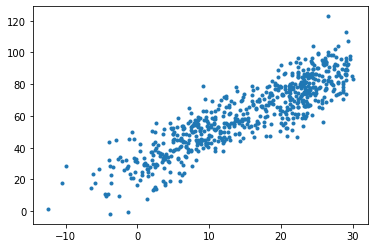

In [61]:
plt.plot(temp,icecream,'.')

`-` 온도 vs 소아마비

In [62]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease=temp*0.5 + 40 +ϵ2

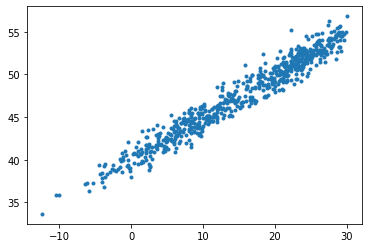

In [63]:
plt.plot(temp,disease,'.')

`-` 아이스크림판매량 vs 소아마비

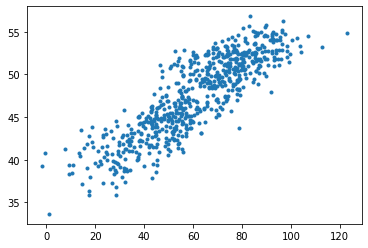

In [64]:
plt.plot(icecream,disease,'.')

In [65]:
np.corrcoef(icecream,disease)

array([[1.        , 0.86298975],
       [0.86298975, 1.        ]])

- 0.86정도.. 

`-` 여름만 뽑아서 그러보면? 

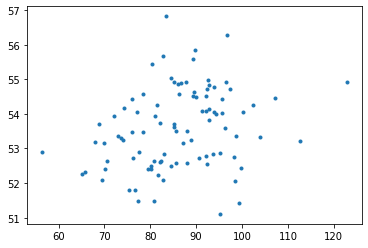

In [66]:
plt.plot(icecream[temp>25],disease[temp>25], '.') ## 평균기온이 25도가 넘어가면 여름

`-` 산점도 

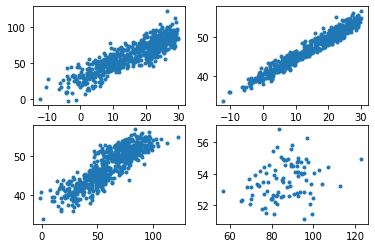

In [67]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

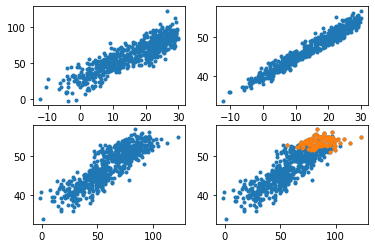

In [68]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

### 온도구간을 세분화 하여 시각화 

`-` 목표: 모든 온도구간에 대하여 각각 색을 다르게 하여 그려보자. 

- 사실 지금 변수는 온도, 아이스크림판매량, 소아마비 
- 지금까지는 기본산점도만 사용하였기에 2차원플랏만 그렸음 $\to$ 그래서 각각의 산점도를 정신없이 그려왔음 
- 온도가 유사한 지역을 색으로 묶으면 3차원 플랏이 가능함 

`-` 일단 데이터 프레임을 정리하자. 

In [69]:
df1=pd.DataFrame({'temp':temp, 'icecream':icecream, 'disease':disease})

In [70]:
df1

,temp,icecream,disease
0,-0.5,45.243454,39.333242
1,1.4,26.682436,40.643733
2,2.6,29.918282,39.163804
3,2.0,23.270314,42.640271
4,2.5,43.654076,39.456564
...,...,...,...
651,19.9,78.839992,49.633906
652,20.4,86.554679,48.920443
653,18.3,78.666079,49.882650
654,12.8,52.771364,46.613159


`-` 온도를 카테고리화 하자 $\to$ 적당한 구긴을 설정하기 위해서 히스토그램을 그려보자. 

<AxesSubplot:>

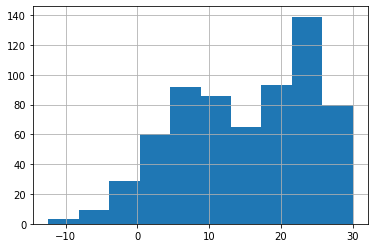

In [71]:
df1.temp.hist()

(array([  3.,   9.,  29.,  60.,  92.,  86.,  65.,  93., 139.,  80.]),
 array([-12.4 ,  -8.16,  -3.92,   0.32,   4.56,   8.8 ,  13.04,  17.28,
         21.52,  25.76,  30.  ]),
 <BarContainer object of 10 artists>)

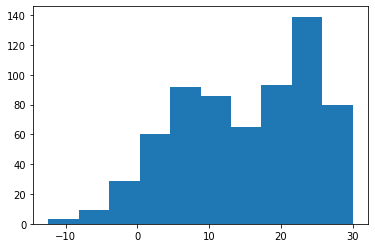

In [72]:
plt.hist(df1.temp)

`-` 구간은 5정도로 하면 적당할것 같다. 

In [84]:
def f(x): 
    if x<0: 
        y='Temp: <0'
    elif x<5: 
        y='Temp: 0~5'
    elif x<10: 
        y='Temp: 5~10'
    elif x<15: 
        y='Temp: 10~15'
    elif x<20:
        y='Temp: 15~20'
    elif x<25: 
        y='Temp: 20~25'
    else: 
        y='Temp: >30'
    return y 

In [85]:
df1['temp2']=list(map(f,df1.temp))

In [86]:
df1

,temp,icecream,disease,temp2
0,-0.5,45.243454,39.333242,Temp: <0
1,1.4,26.682436,40.643733,Temp: 0~5
2,2.6,29.918282,39.163804,Temp: 0~5
3,2.0,23.270314,42.640271,Temp: 0~5
4,2.5,43.654076,39.456564,Temp: 0~5
...,...,...,...,...
651,19.9,78.839992,49.633906,Temp: 15~20
652,20.4,86.554679,48.920443,Temp: 20~25
653,18.3,78.666079,49.882650,Temp: 15~20
654,12.8,52.771364,46.613159,Temp: 10~15


In [87]:
from plotnine import * 

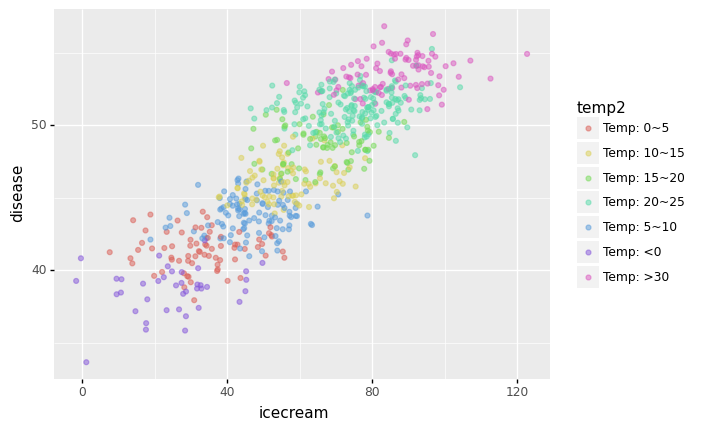

<ggplot: (8789318085145)>

In [88]:
ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.5)

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


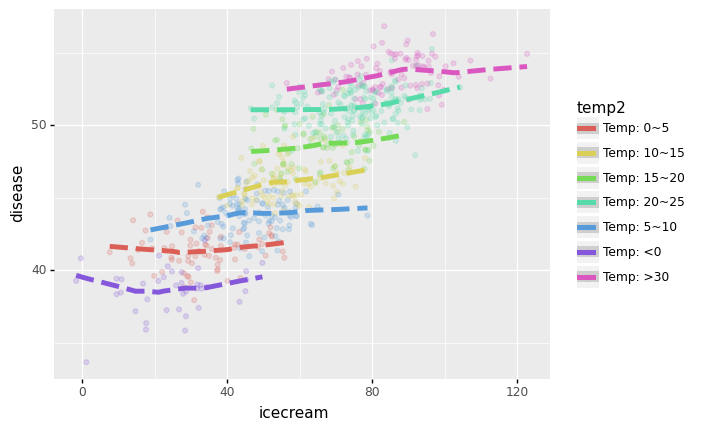

<ggplot: (8789316439909)>

In [89]:
ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

`-` 온도를 통제하니까 아이스크림과 질병은 관련이 없어보인다. 

### 진짜 만약에 아이스크림과 소아마비가 관련있는 경우라면? 

In [90]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

In [91]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease= 30+ temp*0.0 + icecream*0.15 +ϵ2*2

In [92]:
df2=pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df2['temp2']=list(map(f,df2.temp))

In [93]:
df2

,temp,icecream,disease,temp2
0,-0.5,45.243454,35.953002,Temp: <0
1,1.4,26.682436,33.889832,Temp: 0~5
2,2.6,29.918282,30.215350,Temp: 0~5
3,2.0,23.270314,36.771089,Temp: 0~5
4,2.5,43.654076,32.961240,Temp: 0~5
...,...,...,...,...
651,19.9,78.839992,41.193811,Temp: 15~20
652,20.4,86.554679,40.424088,Temp: 20~25
653,18.3,78.666079,43.265212,Temp: 15~20
654,12.8,52.771364,38.342022,Temp: 10~15


/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


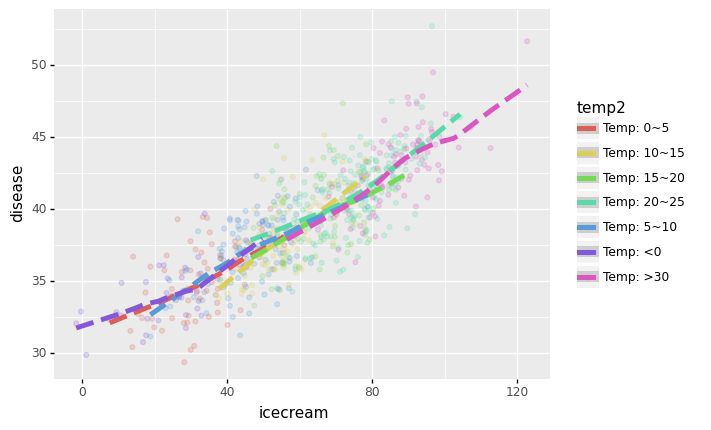

<ggplot: (8789318111317)>

In [94]:
ggplot(data=df2)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

In [95]:
df1.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.975609
icecream,0.884366,1.000000,0.862990
disease,0.975609,0.862990,1.000000


In [96]:
df2.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.725505
icecream,0.884366,1.000000,0.830539
disease,0.725505,0.830539,1.000000


## FIFA 선수들 시각화

### FIFA data 

`-` FIFA22라는 축구게임이 있음 (굉장히 인기있음) 

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음 

`-` 이 능력치에 대한 데이터셋은 캐글에 공개되어 있음 

### Data

In [97]:
fifa22=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

`-` Overall을 기준으로 정렬하여 보자.

In [98]:
fifa22=fifa22.sort_values(by='Overall',ascending=False).reset_index().rename(columns={'index':'index_old'})

In [99]:
fifa22.head()

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0


### Overall vs Potential

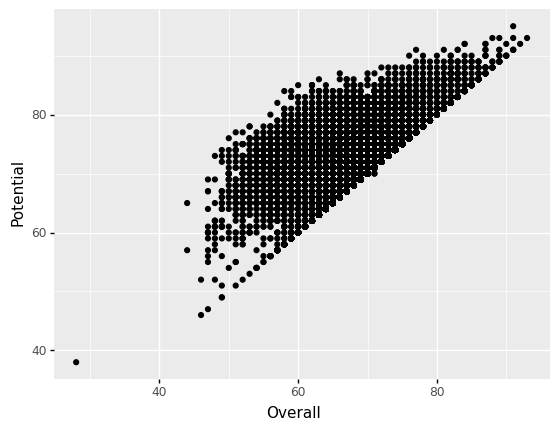

<ggplot: (8789316217305)>

In [105]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential'))

`-` 뭔가 Potential > Overall 인 관계가 성립하는것 같다. $\to$ Potetial_Delta = Potential - Overall 인 변수를 새로 만들고 시각화해보자. 
- 판다스: 새로운열 추가

In [110]:
fifa22['Potential_Delta'] = fifa22['Potential'] - fifa22['Overall']

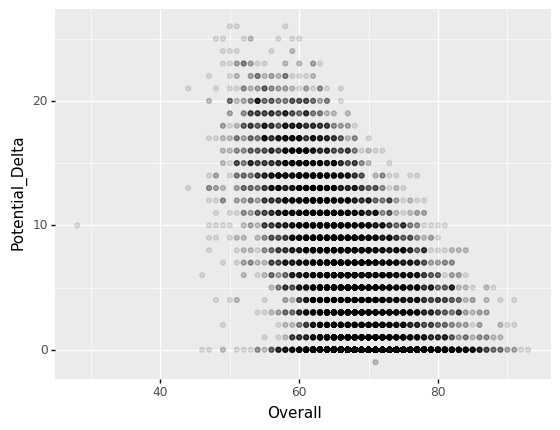

<ggplot: (8789310568869)>

In [112]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential_Delta'),alpha=0.1)

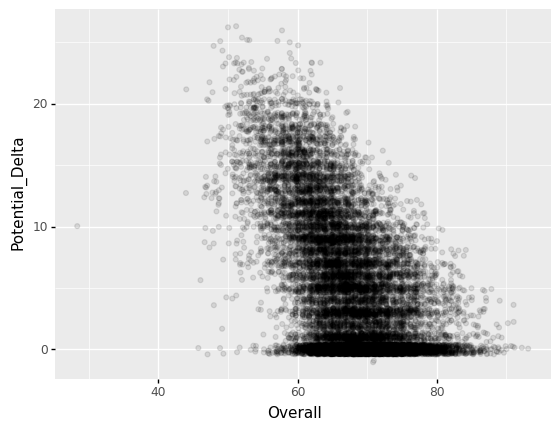

<ggplot: (8789315452065)>

In [113]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential_Delta'),alpha=0.1,position='jitter')

`-` Potential_Delta가 너무 0근처인 선수들이 있다. (아마 은퇴한 선수가 아닐까?) $\to$ 제외하고 그리자. 

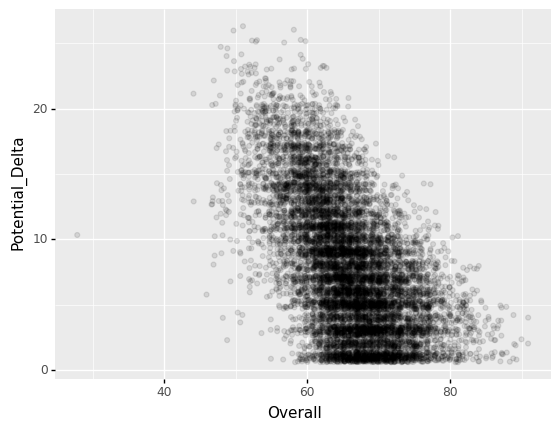

<ggplot: (8789315250289)>

In [114]:
ggplot(data=fifa22.query('Potential_Delta>0.1'))+geom_point(aes(x='Overall', y='Potential_Delta'),alpha=0.1,position='jitter')

`-` 해석 
- 음의 상관관계가 있다. 
- 오버올이 클수록 Potential_Delta의 분산이 작아진다. (오버올이 클수록 더 성장할 부분이 없으니까) 

`-` Overall을 구간별로 나누자: 어느정도가 적당한 구간일까? 

In [116]:
fifa22.Overall.describe()

count    16710.000000
mean        67.646320
std          6.457695
min         28.000000
25%         63.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: Overall, dtype: float64

In [117]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

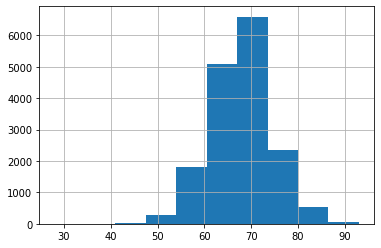

In [118]:
fifa22.Overall.hist()

In [119]:
def f(x): 
    if x>72: y='Q1' 
    elif x>68: y='Q2'
    elif x>63: y='Q3'
    else: y='Q4'
    return y 

In [120]:
fifa22['Q']=list(map(f,fifa22.Overall))
fifa22[['Q','Overall']]

,Q,Overall
0,Q1,93
1,Q1,92
2,Q1,91
3,Q1,91
4,Q1,91
...,...,...
16705,Q4,46
16706,Q4,46
16707,Q4,44
16708,Q4,44


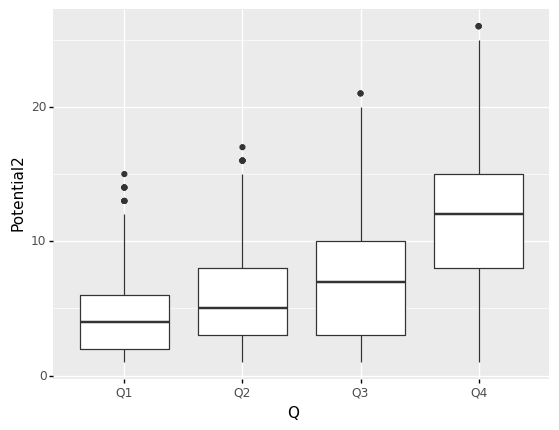

<ggplot: (8789310724501)>

In [121]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_boxplot(aes(x='Q',y='Potential2'))

`-` Q1으로 갈수록 분산이 작아짐! $\to$ 헷갈린다... 

`-` 산점도와 박스플랏을 겹쳐서 그린다면 좀더 이해가 쉬울것 같다. 

`-` x축의 위치를 조정하면 될것 같다 $\to$ Q1, Q2, Q3, Q4 각 그룹별로 x축의 위치를 구하자. 

In [122]:
fifa22.query('Q=="Q1"').Overall.mean()

76.3506528835691

- 이런식으로 해도 되지만 

In [123]:
fifa22.groupby(by='Q').mean().Overall

Q
Q1    76.350653
Q2    70.411781
Q3    66.074449
Q4    59.602691
Name: Overall, dtype: float64

In [124]:
l=fifa22.groupby(by='Q').mean().Overall.to_list()
l

[76.3506528835691, 70.4117807472048, 66.07444942506334, 59.60269121813031]

`-` 이제 박스플랏이 들어갈 x축의 위치를 저장할 컬럼을 추가하고 그 이름을 Qx 라고 하자. 

In [125]:
def g(x): 
    if x=='Q1': y=l[0]
    elif x=='Q2': y=l[1]
    elif x=='Q3': y=l[2]
    else: y=l[3]
    return y

In [126]:
fifa22['Qx']=list(map(g,fifa22.Q))

In [127]:
fifa22

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2,Potential_Delta,Q,Qx
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,14.0,8.0,RW,93.0,€144.3M,20.0,0,0,Q1,76.350653
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,8.0,10.0,ST,92.0,€197.2M,35.0,0,0,Q1,76.350653
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,90.0,90.0,GK,91.0,€238M,27.0,2,2,Q1,76.350653
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,10.0,13.0,CM,91.0,€232.2M,68.0,0,0,Q1,76.350653
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,15.0,11.0,LW,91.0,€238.7M,35.0,0,0,Q1,76.350653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,13.0,6.0,CM,45.0,€47K,NaN,0,0,Q4,59.602691
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,14.0,11.0,CB,46.0,NaN,NaN,6,6,Q4,59.602691
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,20.0,20.0,CM,46.0,NaN,NaN,21,21,Q4,59.602691
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,9.0,7.0,CB,44.0,NaN,NaN,13,13,Q4,59.602691


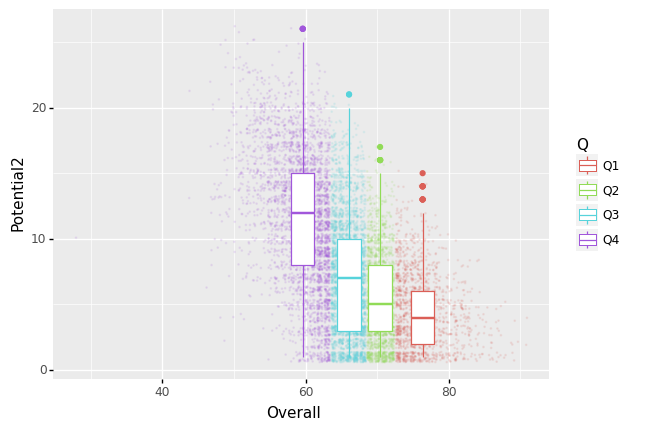

<ggplot: (8789309901365)>

In [128]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_point(aes(x='Overall', y='Potential2',color='Q'),alpha=0.1,size=0.1,position='jitter')\
+geom_boxplot(aes(x='Qx', y='Potential2',color='Q'))

## mpl 미세먼지팁 

### Latex 

`-` 예시1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, '$y_1=(x_1-1)^2$')

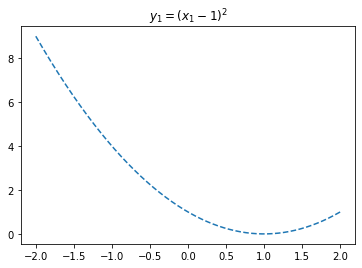

In [9]:
x1= np.linspace(-2,2,1000)
y1= (x1-1)**2 
fig, ax = plt.subplots()
ax.plot(x1,y1,'--')
ax.set_title('$y_1=(x_1-1)^2$')

`-` 예시2

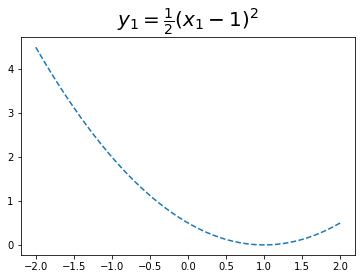

In [649]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
fig, ax = plt.subplots()
ax.plot(x1,y1,'--')
ax.set_title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20);

`-` 예시3

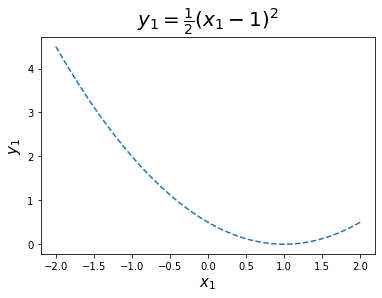

In [652]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
fig, ax = plt.subplots()
ax.plot(x1,y1,'--')
ax.set_title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20)
ax.set_xlabel(r'$x_1$',size=15)
ax.set_ylabel(r'$y_1$',size=15);

`-` 예시4

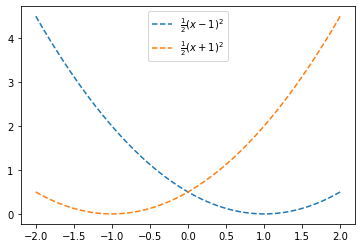

In [656]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
y2 = 0.5*(x1+1)**2
fig, ax = plt.subplots()
ax.plot(x1,y1,'--',label=r'$\frac{1}{2}(x-1)^2$')
ax.plot(x1,y2,'--',label=r'$\frac{1}{2}(x+1)^2$')
ax.legend()

### fig.subplots() 

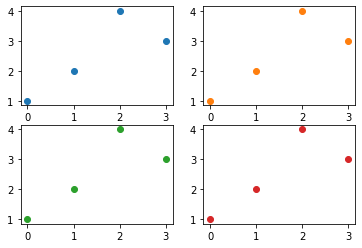

In [585]:
fig,ax = plt.subplots(2,2)
ax[0,0].plot([1,2,4,3],'o',color='C0')
ax[0,1].plot([1,2,4,3],'o',color='C1')
ax[1,0].plot([1,2,4,3],'o',color='C2')
ax[1,1].plot([1,2,4,3],'o',color='C3')

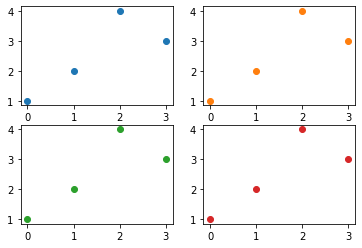

In [586]:
fig = plt.figure()
ax = fig.subplots(2,2)
ax[0,0].plot([1,2,4,3],'o',color='C0')
ax[0,1].plot([1,2,4,3],'o',color='C1')
ax[1,0].plot([1,2,4,3],'o',color='C2')
ax[1,1].plot([1,2,4,3],'o',color='C3')

### plt.subplot

- 끝에 s가 없어요!!

`-` 기능1: 몰라도 됩니당.. (아마도)

`-` 기능2: 특이해요.. fig를 안받아도 무방함

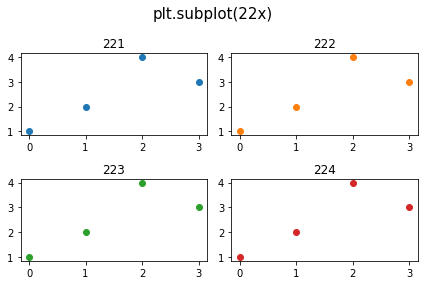

In [576]:
ax1 = plt.subplot(221) 
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.plot([1,2,4,3],'o',color='C0');ax1.set_title('221')
ax2.plot([1,2,4,3],'o',color='C1');ax2.set_title('222')
ax3.plot([1,2,4,3],'o',color='C2');ax3.set_title('223')
ax4.plot([1,2,4,3],'o',color='C3');ax4.set_title('224')

fig=plt.gcf()
fig.suptitle("plt.subplot(22x)",size=15)
fig.tight_layout()

위는 아래와 같은 코드임 

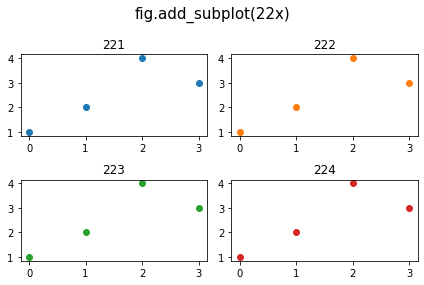

In [577]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot([1,2,4,3],'o',color='C0');ax1.set_title('221')
ax2.plot([1,2,4,3],'o',color='C1');ax2.set_title('222')
ax3.plot([1,2,4,3],'o',color='C2');ax3.set_title('223')
ax4.plot([1,2,4,3],'o',color='C3');ax4.set_title('224')

fig.tight_layout()
fig.suptitle("fig.add_subplot(22x)",size=15)
fig.tight_layout()

`-` fig.add_subplot() vs fig.add_axes() 
- fig.add_subplot(): 입력으로 nrows, ncols, index 전달 (편하게 쓰기엔 좋아)
- fig.add_axes(): 입력으로 left, bottom, width, height 전달 (이상한 그래프 만들기 좋아)

`-` plt.subplots() vs plt.subplot() 
- plt.subplots(): 넣을 수 있는 액시즈 종류가 한가지 
- plt.subplot(): 여러 (특이한) 액시즈를 넣을 수 있음 

(기본액시즈)

<AxesSubplot:>

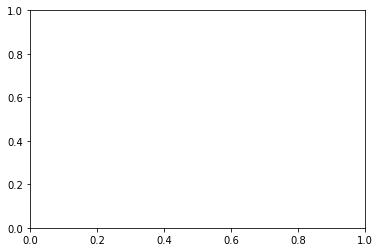

In [544]:
plt.subplot(111,projection=None)

(3d 액시즈)

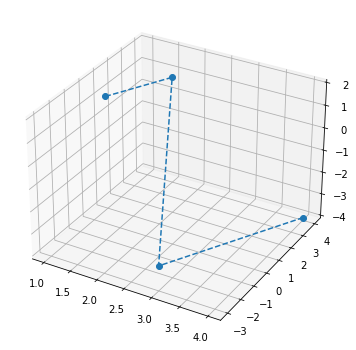

In [569]:
ax=plt.subplot(111,projection='3d')
ax.plot([1,2,3,4],[1,2,-3,4],[1,2,-3,-4],'--o')
fig=plt.gcf()
fig.set_figheight(12)

(polar 액시즈)

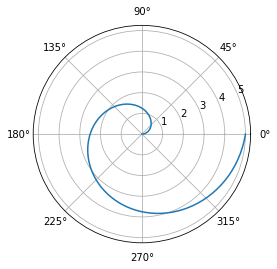

In [555]:
ax=plt.subplot(111,projection='polar')
r = np.linspace(0,5,100)
theta = np.linspace(0,2*np.pi,100)
ax.plot(theta,r)